# Intro to Quantum Computing with Qiskit

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

from math import sqrt, pi

%matplotlib inline
from matplotlib import *

# Single Qubit
Qubits are the fundamental unit of a quantum circuit. We can put qubits together with specific gates, and do calculations from there. But first, let's observe a single qubit.

Below we will setup a single qubit, and a way of measuring the state of that qubit (which is then stored in a classical bit).

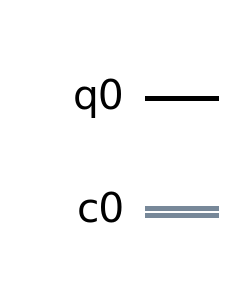

In [2]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)
circuit.draw(output='mpl', scale=2.5)

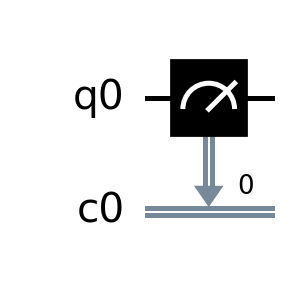

In [3]:
circuit.measure(qr, cr)
circuit.draw(output='mpl', scale=2.5)

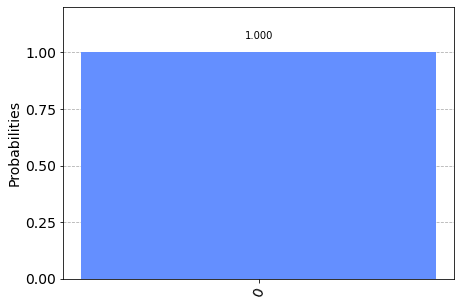

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))

We see that we always measure a 0 from the simulated qubit. But we can use a Hadamard gate which puts the quantum bit into superposition and see how that modifies our measurements.

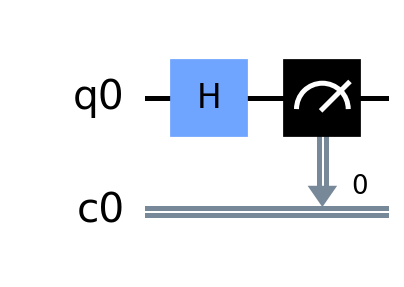

In [13]:
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.measure(qr, cr)
circuit.draw(output='mpl', scale=2.5)

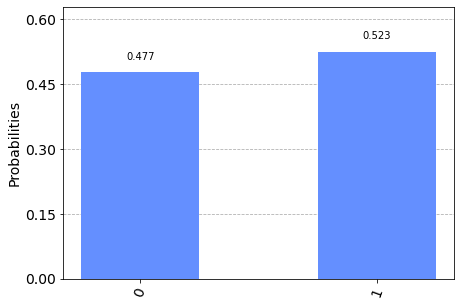

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))

We can look at this in a mathematical form in the following matrices. A single qubit is represented by the vector $ |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $ denoting the 0 state, and $ |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $ denoting the 1 state. We can then look at the hadamard gate as the matrix $ \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $. We can then get the following equation of our qubit going through the hadamard gate.

$$ \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} * \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} $$

What this shows is that we have a vector that has equal probability of being $ |0\rangle $ or $|1\rangle$ or we could denote it as $ \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle $

We then see that the simulated probability of measuring a 0 or a 1 is approximately equal.

# Setting a Superposition
We can also set the superposition directly in our quantum circuit.

Below we will set the state of our quantum bit to $ \begin{bmatrix} \frac{1}{\sqrt{3}} \\ \frac{\sqrt{2}}{\sqrt{3}} \end{bmatrix}$

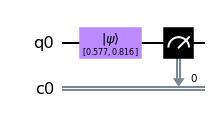

In [7]:
circuit = QuantumCircuit(qr, cr)
initial_state = [1/sqrt(3), 0.+1.*sqrt(2)/sqrt(3)]
circuit.initialize(initial_state, 0)
circuit.measure(qr, cr)
circuit.draw(output='mpl')

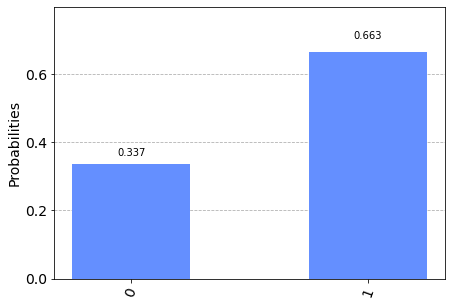

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts(circuit))

# Bloch Sphere Visualization
We can visualize our vectors in a bloch sphere to get a more intuitive understanding of what is happening.

/home/joey/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


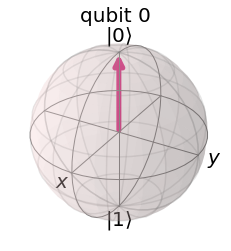

In [9]:
plot_bloch_multivector([1,0])

/home/joey/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


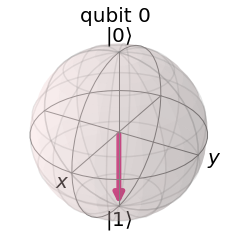

In [10]:
plot_bloch_multivector([0,1])

/home/joey/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


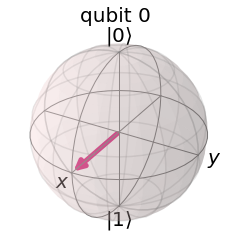

In [11]:
state1 = [1/sqrt(2), 1/sqrt(2)]
plot_bloch_multivector(state1)

/home/joey/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


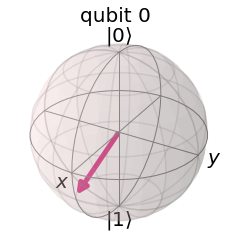

In [12]:
state2 = [1/sqrt(3), 0.+sqrt(2)/sqrt(3)]
plot_bloch_multivector(state2)